In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

time        0.00000
theta1      0.17019
theta2      2.35061
omega1      0.00000
omega2      0.00000
torque1   -11.02992
torque2    -1.40611
x          -0.30000
y           0.10000
Name: 0, dtype: float64
time        9.99500
theta1     -0.44368
theta2      2.23195
omega1     -0.00089
omega2     -0.00072
torque1    16.47319
torque2    -2.61254
x          -0.20033
y           0.29927
Name: 1999, dtype: float64


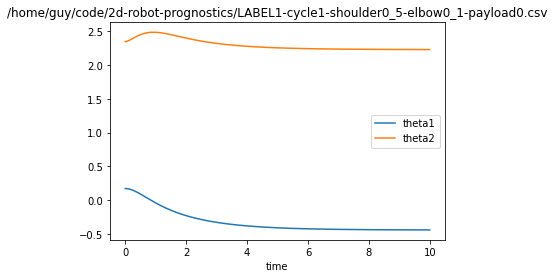

In [34]:
with open('header.txt') as f:
    header = f.readline().split('\t')
    
fname='/home/guy/code/2d-robot-prognostics/LABEL1-cycle1-shoulder0_5-elbow0_1-payload0.csv'
df = pd.read_csv(fname, sep=' ', names=header)
df.plot(x='time', y=['theta1','theta2'])
plt.title(fname)

print(df.iloc[0])
print(df.iloc[-1])

# fname='/home/guy/code/2d-robot-prognostics/LABEL1-cycle4-shoulder0_5-elbow0_1-payload10.csv'
# df = pd.read_csv(fname, sep=' ', names=header)
# df.plot(x='time', y=['theta1','theta2'])
# plt.title(fname)




Text(0.5, 1.0, '/home/guy/code/2d-robot-prognostics/LABEL1-cycle1-shoulder0_5-elbow0_1-payload0.csv')

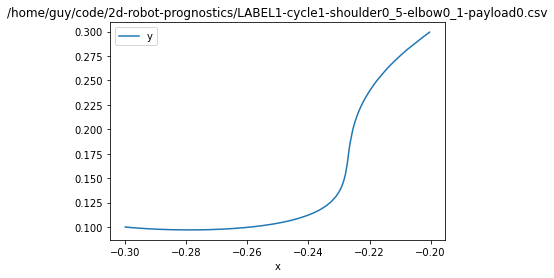

In [32]:
fname='/home/guy/code/2d-robot-prognostics/LABEL1-cycle1-shoulder0_5-elbow0_1-payload0.csv'
df = pd.read_csv(fname, sep=' ', names=header)
df.plot(x='x', y='y')
plt.title(fname)


99.75111522224823 224.6801382075606
64.49752704062232 217.8148803419521


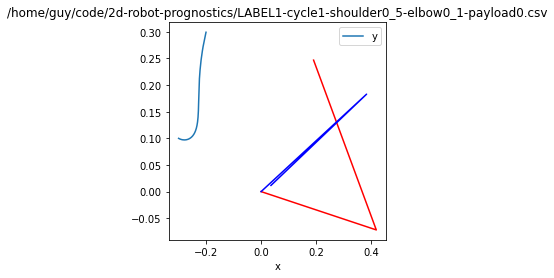

In [38]:
from src.robotmodel import inverseKinematics
from simulation import model_constants
import numpy as np
l1 = 0.425
l2 = 0.392

(theta1, theta2) = inverseKinematics(model_constants, 0.3, 0.1)
theta1 = theta1 + np.pi/2
theta2 = theta2 + np.pi/2

xstart1 = l1*np.sin(theta1)
ystart1 = l1*np.cos(theta1)
xstart2 = xstart1 + l2*np.sin(theta1+theta2)
ystart2 = ystart1 + l2*np.cos(theta1+theta2)
# print(theta1,theta2)
print(np.rad2deg(theta1), np.rad2deg(theta2))


(theta1, theta2) = inverseKinematics(model_constants, 0.2, 0.3)
theta1 = theta1 + np.pi/2
theta2 = theta2 + np.pi/2
xend1 = l1*np.sin(theta1)
yend1 = l1*np.cos(theta1)
xend2 = xstart1 + l2*np.sin(theta1+theta2)
yend2 = ystart1 + l2*np.cos(theta1+theta2) 
print(np.rad2deg(theta1), np.rad2deg(theta2))
# print(theta1,theta2)

fig = plt.figure()
ax = fig.add_subplot(111)

fname='/home/guy/code/2d-robot-prognostics/LABEL1-cycle1-shoulder0_5-elbow0_1-payload0.csv'
df = pd.read_csv(fname, sep=' ', names=header)
df.plot(x='x', y='y', ax=ax)
plt.title(fname)

plt.plot([0,xstart1,xstart2],[0,ystart1,ystart2], color='red')
plt.plot([0,xend1,xend2],[0,yend1,yend2], color='blue')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')